In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [6]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)

<IPython.core.display.Javascript object>

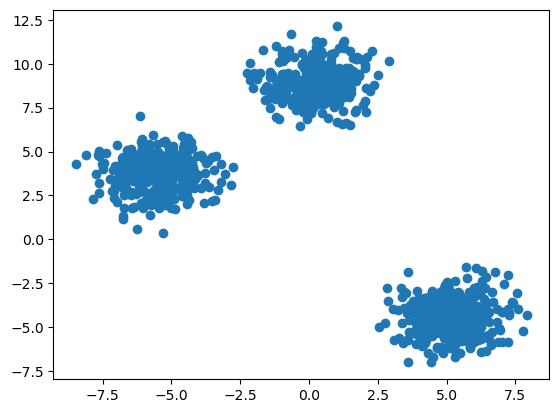

In [8]:
plt.scatter(x[:,0],x[:,1])

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.cluster import KMeans

In [14]:
## manual way of finding the k value which is a elbow method
wcss=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(x_train)
    wcss.append(km.inertia_)

D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=

In [15]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 991.8238694516631,
 853.2949954519912,
 754.6094520229813,
 663.3632096802178,
 577.9067942426868,
 532.9920886350961]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'WCSS')

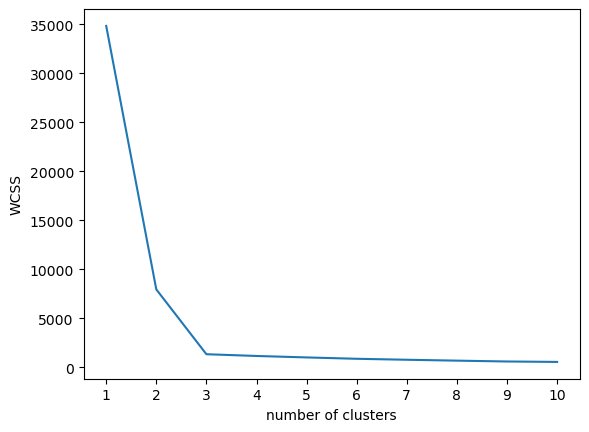

In [16]:
## now make the elbow curve to find the k value:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

In [18]:
km=KMeans(n_clusters=3,init='k-means++')

In [22]:
y_labels=km.fit_predict(x_train)
y_labels

D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2,

<IPython.core.display.Javascript object>

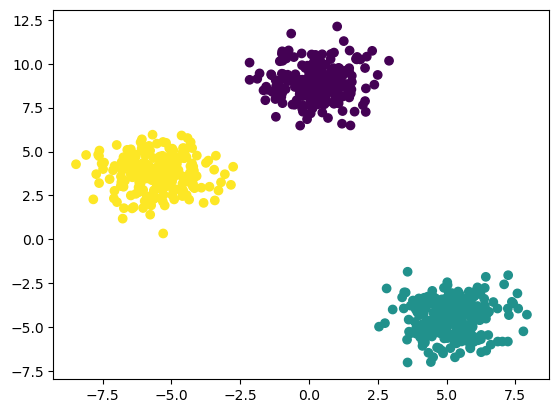

In [23]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

### automatic way of finding the k value:
 ## knee locator.
 

In [25]:
!pip install kneed

In [27]:
from kneed import KneeLocator

In [29]:
auto=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
auto.elbow

3

## performace metrics, silhouette score

In [30]:
from sklearn.metrics import silhouette_score

In [32]:
silhoutte_coeeficients=[]
for k in range(2,11):
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(x_train)
    score=silhouette_score(x_train,km.labels_)
    silhoutte_coeeficients.append(score)

D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=

In [33]:
silhoutte_coeeficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.489917603272088,
 0.33892249336374314,
 0.3497193753105919,
 0.3490520358556949,
 0.34515730167724085,
 0.34032282332752317]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'silhouette coefficients')

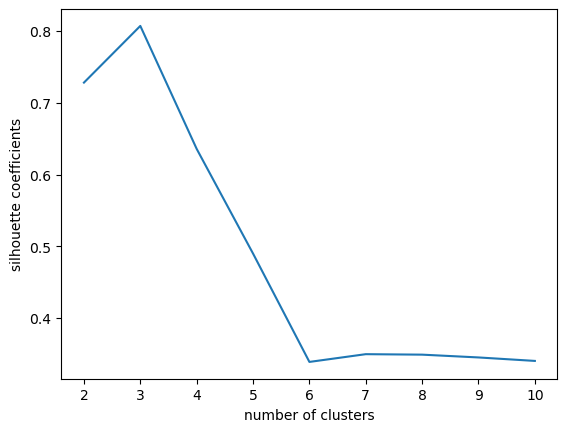

In [35]:
plt.plot(range(2,11),silhoutte_coeeficients)
plt.xticks(range(2,11))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')

## iris dataset:


In [36]:
df=pd.read_csv('IRIS-Copy1.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.drop('species',axis=1,inplace=True) 

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
## perform scaling:
from sklearn.preprocessing import StandardScaler

In [42]:
scaling=StandardScaler()

In [49]:
data=scaling.fit_transform(df)
data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [46]:
new_df=pd.DataFrame(data=data,columns=df.columns)

In [48]:
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [52]:
## reducing the features using the PCA
from sklearn.decomposition import PCA

In [53]:
decompose=PCA(n_components=2)

In [59]:
reduction=decompose.fit_transform(new_df)
reduction

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [57]:
least_features=pd.DataFrame(data=reduction,columns=['sepal_length','sepal_width'])

In [58]:
least_features.head()

,sepal_length,sepal_width
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
